# Heatmap plotting
## Import functions

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from constants import PLOT_PATH

def create_cross_table(df):
    """
    Creates a cross-table of unique values for each column in the DataFrame 
    and saves it as a pandas DataFrame.

    Args:
        df: The pandas DataFrame.

    Returns:
        A pandas DataFrame representing the cross-table.
    """

    unique_values = {col: sorted(df[col].unique()) for col in df.columns}
    data = {}

    for col in df.columns:
        data[col] = df[col].values 

    cross_table = pd.DataFrame(data)

    # Add a column for each unique value in each column
    for col in df.columns:
        for val in unique_values[col]:
            cross_table[f"{val}"] = [
                "x" if v == val else "" for v in cross_table[col]
            ]

    # Drop the original columns 
    cross_table = cross_table.drop(columns=df.columns) 

    return cross_table

## Import data

In [92]:
#df = pd.read_csv(your_data_path, header=0)
df['merged_name'] = df['embedding'] + '_' + df['tokenizer'] + '_' + df['dataset'] + '_' + df['architecture']
df

## Plot heatmap and dendogram

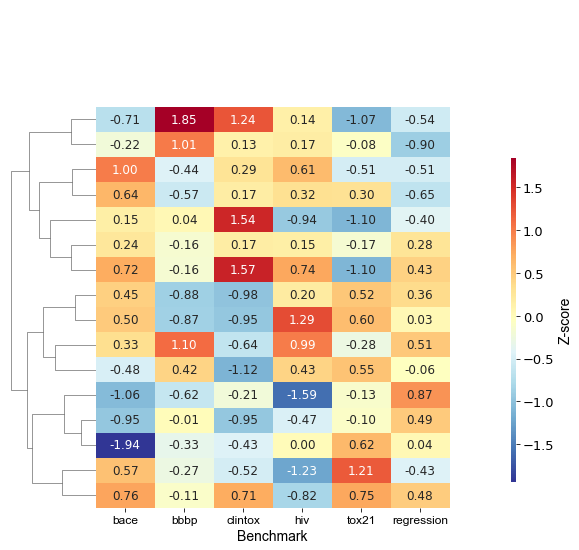

In [219]:
data = df[['bace', 'bbbp', 'clintox', 'hiv', 'tox21', 'regression']]
similarity_matrix = cosine_similarity(data)
linkage_matrix = shc.linkage(similarity_matrix, method= 'complete')
# Create a clustermap with seaborn
g = sns.clustermap(data,
                   row_linkage=linkage_matrix, 
                   col_cluster=False,  # We do not need clustering for columns
                   yticklabels=False,
                   cmap='RdYlBu_r',
                   annot=True,
                   fmt=".2f",
                   figsize=(6.5, 7.5),
                   annot_kws={"size": 12}, 
                   cbar_pos=(1.1, 0.1, 0.01, 0.6))
# Control font size and family for annotations
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=12, fontfamily='Arial')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=12, fontfamily='Arial')
g.ax_heatmap.set_xlabel('Benchmark', fontsize=14, fontfamily='Arial')

# Control font size and family for colorbar labels
g.cax.tick_params(labelsize=13)
g.cax.set_ylabel('Z-score', fontsize=14, fontfamily='Arial')

# Add cross table
row_order = g.dendrogram_row.reordered_ind  # This gives the order of columns
cross_table_df_sorted = cross_table_df.iloc[row_order, :]
g.savefig(PLOT_PATH/'clustermap.svg')
plt.show()

## Plot table

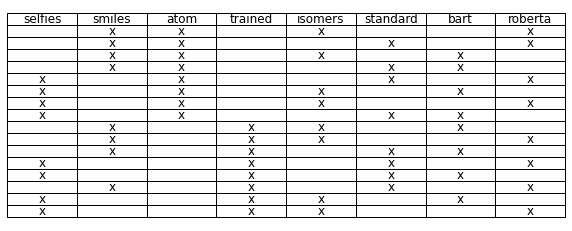

In [221]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
# Create the table
table = ax.table(
    cellText=cross_table_df_sorted.values,

    colLabels=cross_table_df_sorted.columns,
    loc='center',
    cellLoc='center',
)
# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
fig.savefig('table.svg')